# COVID / Unemployment data exploration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.tsa.stattools import adfuller
plt.style.use('fivethirtyeight')

In [22]:
#https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410029301

# unemployment data by province since 2001
ue = pd.read_csv('1410029301_databaseLoadingData_unemp2001.csv')
ue = ue.loc[ue.GEO == 'Canada']

ue['MONTH'] = pd.to_datetime(ue.REF_DATE)
ue['MONTH'] = ue['MONTH'].dt.strftime("%m")
ueA = ue.loc[ue.REF_DATE.str.contains("2020")|ue.REF_DATE.str.contains("2019")]
ueB = ue.loc[ue.REF_DATE.str.contains("2007")|ue.REF_DATE.str.contains("2008")|ue.REF_DATE.str.contains("2009")]
ueC = ue.loc[ue.REF_DATE.str.contains("2001")|ue.REF_DATE.str.contains("2002")|ue.REF_DATE.str.contains("2003")]
ueA = ueA.reset_index(drop=True)
ueB = ueB.reset_index(drop=True)
ueC = ueC.reset_index(drop=True)
ueA['pct'] = ueA['VALUE'].pct_change()
ueA['pct'].iat[0] = 0
ueB['pct'] = ueB['VALUE'].pct_change()
ueB['pct'].iat[0] = 0
ueC['pct'] = ueC['VALUE'].pct_change()
ueC['pct'].iat[0] = 0
ue

,REF_DATE,GEO,DGUID,Labour force characteristics,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS,MONTH
0,2001-07,Canada,2016A000011124,Unemployment rate,Estimate,Percentage,242,units,0,v91413409,1.8.1,7.0,NaN,NaN,NaN,1,07
1,2001-08,Canada,2016A000011124,Unemployment rate,Estimate,Percentage,242,units,0,v91413409,1.8.1,7.2,NaN,NaN,NaN,1,08
2,2001-09,Canada,2016A000011124,Unemployment rate,Estimate,Percentage,242,units,0,v91413409,1.8.1,7.1,NaN,NaN,NaN,1,09
3,2001-10,Canada,2016A000011124,Unemployment rate,Estimate,Percentage,242,units,0,v91413409,1.8.1,6.9,NaN,NaN,NaN,1,10
4,2001-11,Canada,2016A000011124,Unemployment rate,Estimate,Percentage,242,units,0,v91413409,1.8.1,6.8,NaN,NaN,NaN,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,2020-07,Canada,2016A000011124,Unemployment rate,Estimate,Percentage,242,units,0,v91413409,1.8.1,12.3,NaN,NaN,NaN,1,07
229,2020-08,Canada,2016A000011124,Unemployment rate,Estimate,Percentage,242,units,0,v91413409,1.8.1,11.4,NaN,NaN,NaN,1,08
230,2020-09,Canada,2016A000011124,Unemployment rate,Estimate,Percentage,242,units,0,v91413409,1.8.1,10.2,NaN,NaN,NaN,1,09
231,2020-10,Canada,2016A000011124,Unemployment rate,Estimate,Percentage,242,units,0,v91413409,1.8.1,9.2,NaN,NaN,NaN,1,10


In [3]:
hgdp = pd.read_csv('household_gdp.csv')
cgdp = pd.read_csv('constant_gdp_cap.csv')
hgdp['DATE'] = pd.to_datetime(hgdp['DATE'] )
cgdp['DATE'] = pd.to_datetime(hgdp['DATE'] )
hgdp.columns = ['DATE', 'Debt/GDP']
cgdp.columns = ['DATE', 'Const. GDP/cap']
hgdp['pct'] = hgdp['Debt/GDP'].pct_change()
cgdp['pct'] = cgdp['Const. GDP/cap'].pct_change()
hgdp['pct'].iat[0] = 0
cgdp['pct'].iat[0] = 0

C:\Users\Sasha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Sasha\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:>

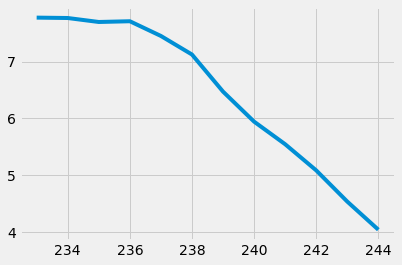

In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(ue['VALUE'],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()
# .fit()
test_predictions = fitted_model.forecast(12)
test_predictions.plot()

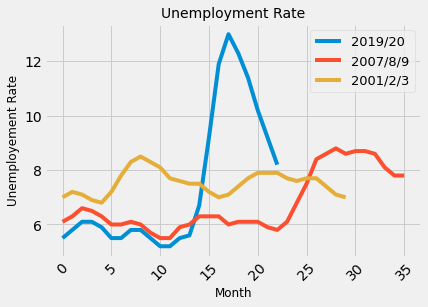

In [15]:
fig, ax = plt.subplots(nrows=1, sharey=True, figsize = (6,4))
ax.plot(ueA.index, ueA.VALUE, label = '2019/20')
ax.plot(ueB.index, ueB.VALUE, label = '2007/8/9')
ax.plot(ueC.index, ueC.VALUE, label = '2001/2/3')
plt.title('Unemployment Rate', fontsize = 14)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Unemployement Rate', fontsize = 12)
plt.legend(fontsize = 13, loc = 'upper right')
plt.xticks(rotation=45)
plt.show()

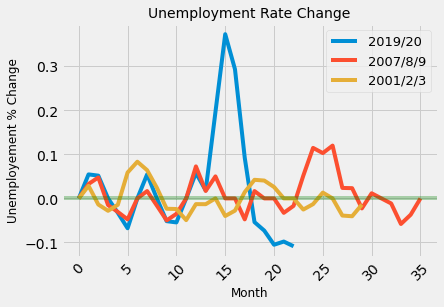

In [20]:
fig, ax = plt.subplots(nrows=1, sharey=True, figsize = (6,4))
ax.plot(ueA.index, ueA.pct, label = '2019/20')
ax.plot(ueB.index, ueB.pct, label = '2007/8/9')
ax.plot(ueC.index, ueC.pct, label = '2001/2/3')
plt.title('Unemployment Rate Change', fontsize = 14)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Unemployement % Change', fontsize = 12)
plt.legend(fontsize = 13, loc = 'upper right')
plt.xticks(rotation=45)
plt.axhline(color='g', alpha=0.3)
plt.show()

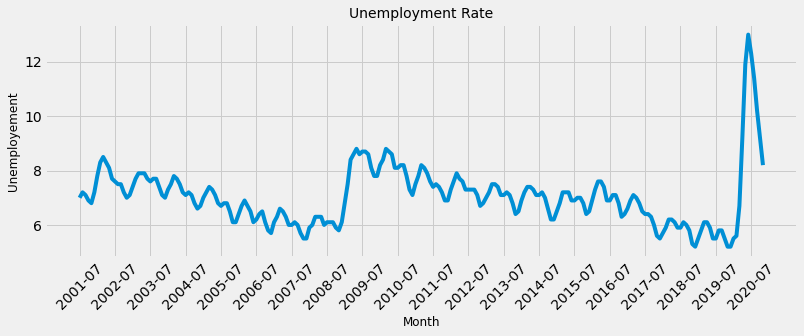

In [32]:
# Unemp in Canada over time
fig, ax = plt.subplots(nrows=1, sharey=True, figsize = (12,4))
ax.plot(ue.REF_DATE, ue.VALUE)
plt.title('Unemployment Rate', fontsize = 14)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Unemployement', fontsize = 12)
plt.xticks([i for i in ue.REF_DATE[::12]],rotation=45)
plt.show()

In [7]:
#https://health-infobase.canada.ca/covid-19/epidemiological-summary-covid-19-cases.html

# total covid cases Canada
covid = pd.read_csv('covid19-download.csv')

covid = covid.loc[covid.prname == 'Canada']
covid = covid.reset_index(drop=True)
covid['date'] = pd.to_datetime(covid['date'])
covid['delta'] = covid.numconf.shift(periods=1)
covid['delta'] =  covid.numconf - covid.delta 
covid['delta'].iat[0] = 4 # hard code first val

<AxesSubplot:>

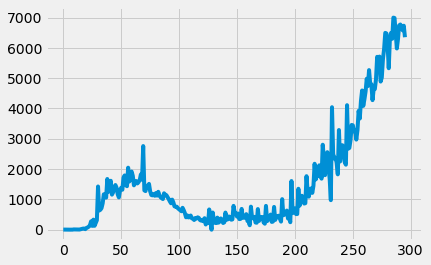

In [8]:
# daily covid change, Canada
covid.delta.plot(x=covid.date)

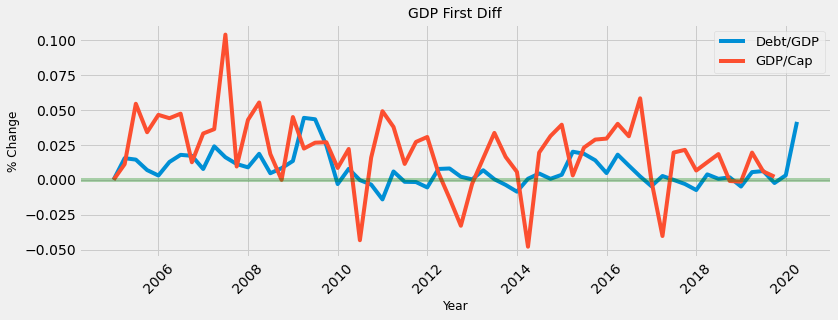

In [10]:
fig, ax = plt.subplots(nrows=1, sharey=True, figsize = (12,4))
ax.plot(hgdp['DATE'],hgdp['pct'], label = 'Debt/GDP')
ax.plot(cgdp['DATE'],cgdp['pct'], label = 'GDP/Cap')
plt.title('GDP First Diff', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('% Change', fontsize = 12)
plt.legend(fontsize = 13, loc = 'upper right')
plt.xticks(rotation=45)
plt.axhline(color='g', alpha=0.3)
plt.show()

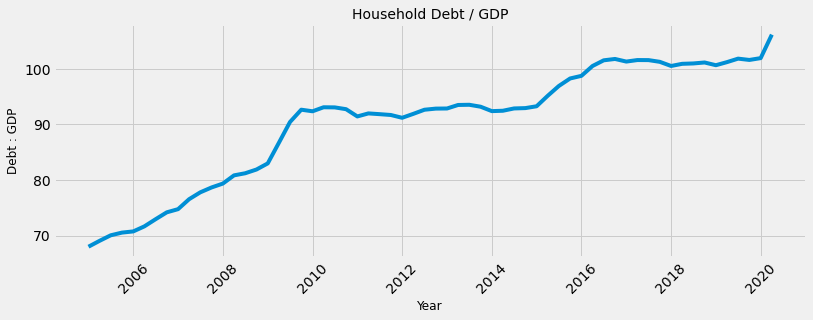

In [11]:
fig, ax = plt.subplots(nrows=1, sharey=False, figsize = (12,4))
ax.plot(hgdp['DATE'],hgdp['Debt/GDP'], label = 'Debt/GDP')
plt.title('Household Debt / GDP', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Debt : GDP', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

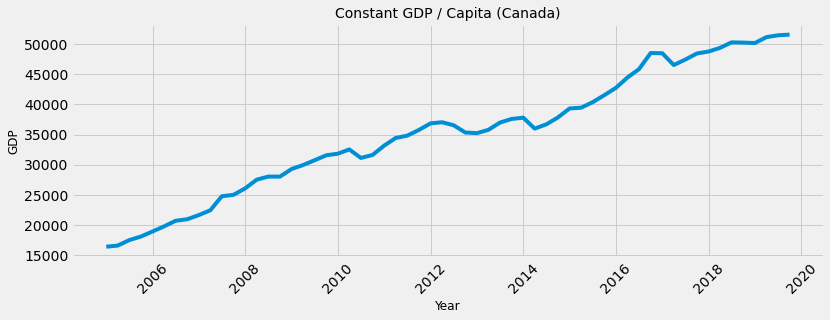

In [12]:
fig, ax = plt.subplots(nrows=1, sharey=False, figsize = (12,4))
ax.plot(cgdp['DATE'],cgdp['Const. GDP/cap'], label = 'GDP/Cap')
plt.title('Constant GDP / Capita (Canada)', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('GDP', fontsize = 12)
plt.xticks(rotation=45)
plt.show()